### Import librairies
Nous importons les bibliothèque fondamentale pour la programme

In [22]:
import pandas as pd
import numpy as np

### Import donnée
Nous allons importer les données des trainSet et testSet dans les features et la variable à déviner

In [44]:
def importData(path):
    #columnNames=["ECP","RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4","FP"]
    columnNames=["RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4","FP"]
    delimit=','
    data = pd.read_csv(path, names=columnNames, sep=delimit)
    #data = data.drop(columns="ECP")
    return data

In [49]:
pathTrain='../2-TransformedData/dataSets_you.csv'
trainSet = importData(pathTrain)

trainSet.head(20)

,RC,MIN,MAX,MEAN,START,END,DURATION,CV,A1,A2,A3,A4,FP
0,214,-64.0,-60.5,-61.350467,1579696871284542,1579696904313953,33029411,-0.010103,210,0,0,4,1
1,270,-62.5,-57.5,-59.281481,1579696871285595,1579696904312689,33027094,-0.022992,211,0,59,0,1
2,226,-59.5,-57.5,-58.466814,1579696871500152,1579696904244782,32744630,-0.007013,0,0,0,226,1
3,225,-55.0,-54.0,-54.553333,1579696871434512,1579696904179782,32745270,-0.004550,0,0,225,0,1
4,226,-54.5,-53.0,-53.741150,1579696871427721,1579696904177340,32749619,-0.005885,0,0,226,0,1
5,861,-63.5,-55.0,-59.699768,1579696871303388,1579696904291870,32988482,-0.045002,190,221,225,225,1
6,102,-63.5,-58.5,-60.862745,1579699467556555,1579699482752500,15195945,-0.013619,0,0,102,0,1
7,40,-62.5,-57.0,-61.062500,1579699467570849,1579699482767500,15196651,-0.022364,9,0,30,1,1
8,4,-60.0,-59.0,-59.500000,1579699475970709,1579699476317416,346707,-0.005942,0,4,0,0,1
9,104,-61.5,-55.5,-57.471154,1579699467643706,1579699482544803,14901097,-0.012411,0,0,0,104,1


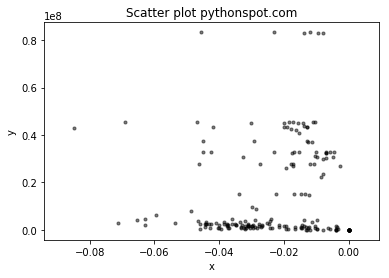

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 500
x = trainSet['CV']
y = trainSet['DURATION']
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Import plot librairie
Il est temps de voir comment les élements X et FP sont liées les uns aux autres avec un graphe

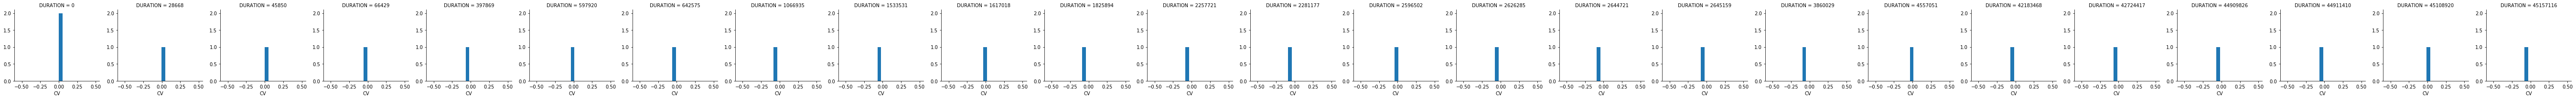

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g = sns.FacetGrid(trainSet, col='DURATION')
g.map(plt.hist, 'CV', bins=20)

### Split Data
Nous allons découper les données d'apprentissage pour avoir la partie feature et y

In [51]:
features=trainSet.loc[:,'RC':'A4']
X = np.array(features).astype(int)
y = np.array(trainSet['FP'])

### Normalize Data
Nous allons 

In [52]:
from sklearn import preprocessing
X = preprocessing.normalize(X)

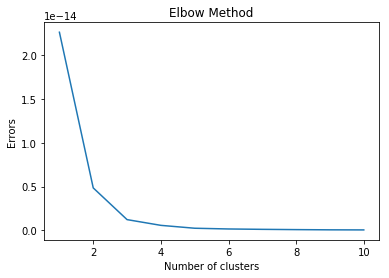

In [53]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    errors.append(kmeans.inertia_)
plt.plot(range(1, 11), errors)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Errors')
plt.show()

### Trainning
Nous allons 

In [58]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [59]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.8118279569892473


In [60]:
y_pred = kmeans.predict(X)
predict_data=trainSet
predict_data['IS_FP']=y_pred

predict_data.head(20)

,RC,MIN,MAX,MEAN,START,END,DURATION,CV,A1,A2,A3,A4,FP,IS_FP
0,214,-64.0,-60.5,-61.350467,1579696871284542,1579696904313953,33029411,-0.010103,210,0,0,4,1,0
1,270,-62.5,-57.5,-59.281481,1579696871285595,1579696904312689,33027094,-0.022992,211,0,59,0,1,1
2,226,-59.5,-57.5,-58.466814,1579696871500152,1579696904244782,32744630,-0.007013,0,0,0,226,1,0
3,225,-55.0,-54.0,-54.553333,1579696871434512,1579696904179782,32745270,-0.004550,0,0,225,0,1,1
4,226,-54.5,-53.0,-53.741150,1579696871427721,1579696904177340,32749619,-0.005885,0,0,226,0,1,1
5,861,-63.5,-55.0,-59.699768,1579696871303388,1579696904291870,32988482,-0.045002,190,221,225,225,1,1
6,102,-63.5,-58.5,-60.862745,1579699467556555,1579699482752500,15195945,-0.013619,0,0,102,0,1,0
7,40,-62.5,-57.0,-61.062500,1579699467570849,1579699482767500,15196651,-0.022364,9,0,30,1,1,0
8,4,-60.0,-59.0,-59.500000,1579699475970709,1579699476317416,346707,-0.005942,0,4,0,0,1,0
9,104,-61.5,-55.5,-57.471154,1579699467643706,1579699482544803,14901097,-0.012411,0,0,0,104,1,0


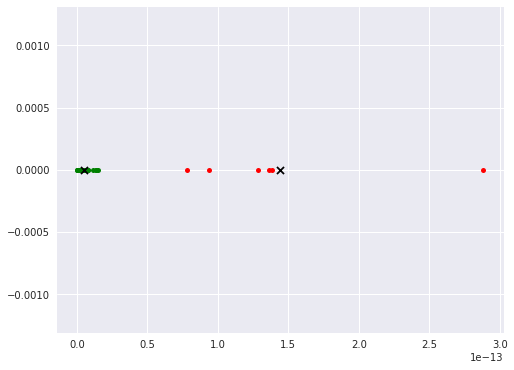

In [374]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
for i in range(len(X)):
    #print(trainSet.iloc[i][1])
    plt.plot(X[i][0], X[i][7], colors[y_pred[i]], markersize = 10)
    

plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=50, linewidths = 5, zorder = 10,c='black')

plt.show()

In [32]:
#LoadData
path='../2-TransformedData/p22_2020-Feb-07-16_26_11.csv'

#path='../2-TransformedData/data2_2020-Jan-31-10_55_51.csv'
toPredict = pd.read_csv(path,names=["RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4"], sep=',')

XFeature = np.array(toPredict).astype(int)
XFeature = preprocessing.normalize(XFeature)
y_p = kmeans.predict(XFeature)

toPredict['IS_FP']=y_p
toPredict

,RC,MIN,MAX,MEAN,START,END,DURATION,CV,A1,A2,A3,A4,IS_FP
2005FB63AC1F3681AB1004E3,23,-63.5,-54.0,-57.869565,1581077923625197,1581078110317635,186692438,-0.035232,17,0,0,6,0
2005FB63AC1F3681AB1005CE,3,-59.5,-59.5,-59.500000,1581078867184388,1581078867438942,254554,-0.000000,0,0,3,0,1
2005FB63EAC13681E4EC0F4B,15,-59.5,-53.0,-55.866667,1581077924990626,1581078866430572,941439946,-0.037185,2,0,5,8,0
2005FB63EAC13681E4EC0F4C,6,-59.0,-54.0,-56.333333,1581078109144061,1581078110547067,1403006,-0.032274,0,0,6,0,1
2005FB63EAC13681E4EC0F4F,24,-59.0,-51.5,-55.937500,1581077924700389,1581078865816082,941115693,-0.034936,0,12,10,2,0
2005FB63EAC13681E4EC0F50,13,-57.0,-51.5,-54.961538,1581077925575635,1581078110914887,185339252,-0.034863,0,5,8,0,0
2005FB63EAC13681E4EC0FEC,3,-57.5,-56.5,-57.000000,1581077923904834,1581078110328937,186424103,-0.007162,3,0,0,0,0
2005FB63EAC13681E5C6025A,2,-60.0,-59.5,-59.750000,1581077926001996,1581077926058099,56103,-0.004184,0,2,0,0,1
2005FB63EAC13681E5C6027B,31,-58.5,-50.0,-54.419355,1581077924721276,1581078865887509,941166233,-0.043541,10,6,8,7,0
2005FB63EAC13681E5C6028D,2,-57.0,-57.0,-57.000000,1581078109042871,1581078109070299,27428,-0.000000,0,2,0,0,1
